## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [11]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [12]:
train, test = keras.datasets.cifar10.load_data()

In [13]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [14]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [15]:
from keras.regularizers import l1, l2, l1_l2
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=0.0, l2_ratio=0.0):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1_l2(l1=l1_ratio, l2=l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1_l2(l1=l1_ratio, l2=l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model

In [16]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 10
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_EXP = [1e-2, 1e-4, 1e-8, 1e-12, 0.0]
L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12, 0.0]

In [17]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for l1r, l2r in itertools.product(L1_EXP, L2_EXP):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with L1 = %.6f, L2 = %.6f" % (l1r, l2r))
    model = build_mlp(input_shape=x_train.shape[1:], l1_ratio=l1r, l2_ratio=l2r)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l1-%s-l2-%s" % (str(l1r), str(l2r))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}



Experiment with L1 = 0.010000, L2 = 0.010000
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Instructions fo

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 3s 51us/step - loss: 198.7454 - acc: 0.2312 - val_loss: 41.1464 - val_acc: 0.2555
Epoch 2/10
50000/50000 [==============================] - 2s 42us/step - loss: 19.0999 - acc: 0.1185 - val_loss: 7.2562 - val_acc: 0.1000
Epoch 3/10
50000/50000 [==============================] - 2s 42us/step - loss: 4.0967 - acc: 0.0982 - val_loss: 2.6463 - val_acc: 0.1000
Epoch 4/10
50000/50000 [==============================] - 2s 42us/step - loss: 2.4860 - acc: 0.0985 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 5/10
50000/50000 [==============================] - 2s 42us/step - loss: 2.4626 - acc: 0.0979 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 6/10
50000/50000 [==============================] - 2s 42us/step - loss: 2.4626 - acc: 0.0974 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 7/10
50000/50000 [==============================] - 2s 42us/step - loss: 2.4626 - acc: 0.0987 - val_loss: 2.4624 - val

50000/50000 [==============================] - 2s 42us/step - loss: 5.3597 - acc: 0.4410 - val_loss: 5.3185 - val_acc: 0.4440
Epoch 7/10
50000/50000 [==============================] - 2s 42us/step - loss: 5.2623 - acc: 0.4498 - val_loss: 5.2251 - val_acc: 0.4479
Epoch 8/10
50000/50000 [==============================] - 2s 42us/step - loss: 5.1672 - acc: 0.4605 - val_loss: 5.1454 - val_acc: 0.4521
Epoch 9/10
50000/50000 [==============================] - 2s 42us/step - loss: 5.0758 - acc: 0.4708 - val_loss: 5.0635 - val_acc: 0.4540
Epoch 10/10
50000/50000 [==============================] - 2s 42us/step - loss: 4.9860 - acc: 0.4793 - val_loss: 4.9717 - val_acc: 0.4650
Experiment with L1 = 0.000100, L2 = 0.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (D

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 3s 54us/step - loss: 15.0656 - acc: 0.2807 - val_loss: 13.9423 - val_acc: 0.3422
Epoch 2/10
50000/50000 [==============================] - 2s 45us/step - loss: 13.0129 - acc: 0.3609 - val_loss: 12.1233 - val_acc: 0.3714
Epoch 3/10
50000/50000 [==============================] - 2s 44us/step - loss: 11.3445 - acc: 0.3821 - val_loss: 10.5910 - val_acc: 0.3934
Epoch 4/10
50000/50000 [==============================] - 2s 42us/step - loss: 9.9343 - acc: 0.3966 - val_loss: 9.2952 - val_acc: 0.4017
Epoch 5/10
50000/50000 [==============================] - 2s 43us/step - loss: 8.7336 - acc: 0.4060 - val_loss: 8.1895 - val_acc: 0.4139
Epoch 6/10
50000/50000 [==============================] - 2s 43us/step - loss: 7.7097 - acc: 0.4152 - val_loss: 7.2455 - val_acc: 0.4156
Epoch 7/10
50000/50000 [==============================] - 2s 42us/step - loss: 6.8370 - acc: 0.4237 - val_loss: 6.4424 - v

50000/50000 [==============================] - 2s 42us/step - loss: 1.5791 - acc: 0.4492 - val_loss: 1.5729 - val_acc: 0.4469
Epoch 7/10
50000/50000 [==============================] - 2s 42us/step - loss: 1.5456 - acc: 0.4609 - val_loss: 1.5571 - val_acc: 0.4478
Epoch 8/10
50000/50000 [==============================] - 2s 41us/step - loss: 1.5160 - acc: 0.4684 - val_loss: 1.5200 - val_acc: 0.4622
Epoch 9/10
50000/50000 [==============================] - 2s 42us/step - loss: 1.4878 - acc: 0.4795 - val_loss: 1.5148 - val_acc: 0.4675
Epoch 10/10
50000/50000 [==============================] - 2s 42us/step - loss: 1.4615 - acc: 0.4878 - val_loss: 1.4802 - val_acc: 0.4781
Experiment with L1 = 0.000000, L2 = 0.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (D

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 2s 50us/step - loss: 2.0426 - acc: 0.2723 - val_loss: 1.8732 - val_acc: 0.3393
Epoch 2/10
50000/50000 [==============================] - 2s 42us/step - loss: 1.8161 - acc: 0.3637 - val_loss: 1.7662 - val_acc: 0.3900
Epoch 3/10
50000/50000 [==============================] - 2s 41us/step - loss: 1.7299 - acc: 0.3955 - val_loss: 1.6911 - val_acc: 0.4112
Epoch 4/10
50000/50000 [==============================] - 2s 42us/step - loss: 1.6703 - acc: 0.4159 - val_loss: 1.6409 - val_acc: 0.4219
Epoch 5/10
50000/50000 [==============================] - 2s 42us/step - loss: 1.6206 - acc: 0.4322 - val_loss: 1.6060 - val_acc: 0.4403
Epoch 6/10
50000/50000 [==============================] - 2s 42us/step - loss: 1.5797 - acc: 0.4489 - val_loss: 1.5706 - val_acc: 0.4482
Epoch 7/10
50000/50000 [==============================] - 2s 41us/step - loss: 1.5447 - acc: 0.4601 - val_loss: 1.5476 - val_acc

50000/50000 [==============================] - 2s 38us/step - loss: 7.7103 - acc: 0.4128 - val_loss: 7.2453 - val_acc: 0.4178
Epoch 7/10
50000/50000 [==============================] - 2s 39us/step - loss: 6.8366 - acc: 0.4202 - val_loss: 6.4442 - val_acc: 0.4228
Epoch 8/10
50000/50000 [==============================] - 2s 38us/step - loss: 6.0935 - acc: 0.4236 - val_loss: 5.7551 - val_acc: 0.4237
Epoch 9/10
50000/50000 [==============================] - 2s 38us/step - loss: 5.4564 - acc: 0.4304 - val_loss: 5.1704 - val_acc: 0.4334
Epoch 10/10
50000/50000 [==============================] - 2s 38us/step - loss: 4.9131 - acc: 0.4364 - val_loss: 4.6724 - val_acc: 0.4319
Experiment with L1 = 0.000000, L2 = 0.000100
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (D

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 2s 42us/step - loss: 2.0138 - acc: 0.2807 - val_loss: 1.8534 - val_acc: 0.3437
Epoch 2/10
50000/50000 [==============================] - 2s 38us/step - loss: 1.7941 - acc: 0.3687 - val_loss: 1.7460 - val_acc: 0.3843
Epoch 3/10
50000/50000 [==============================] - 2s 37us/step - loss: 1.7145 - acc: 0.3972 - val_loss: 1.6804 - val_acc: 0.4066
Epoch 4/10
50000/50000 [==============================] - 2s 37us/step - loss: 1.6584 - acc: 0.4183 - val_loss: 1.6445 - val_acc: 0.4212
Epoch 5/10
50000/50000 [==============================] - 2s 38us/step - loss: 1.6125 - acc: 0.4367 - val_loss: 1.6011 - val_acc: 0.4345
Epoch 6/10
50000/50000 [==============================] - 2s 37us/step - loss: 1.5751 - acc: 0.4478 - val_loss: 1.5679 - val_acc: 0.4482
Epoch 7/10
50000/50000 [==============================] - 2s 38us/step - loss: 1.5407 - acc: 0.4574 - val_loss: 1.5562 - val_acc

Duplicate key in file 'C:\\Users\\MCUT\\anaconda3\\envs\\class\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc' line #250.


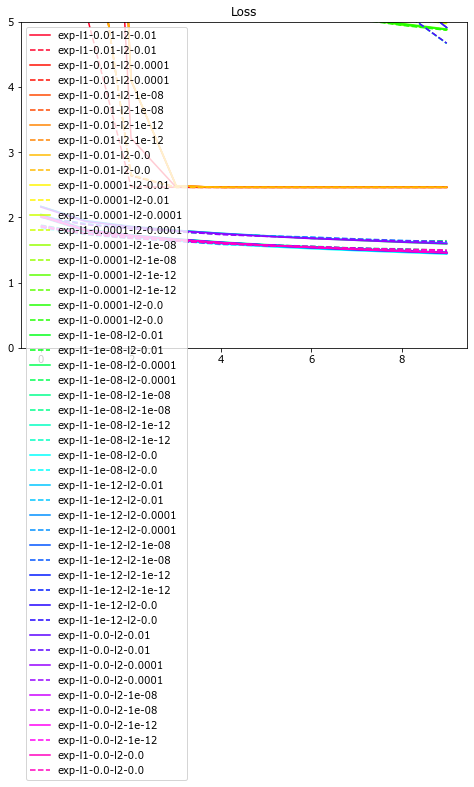

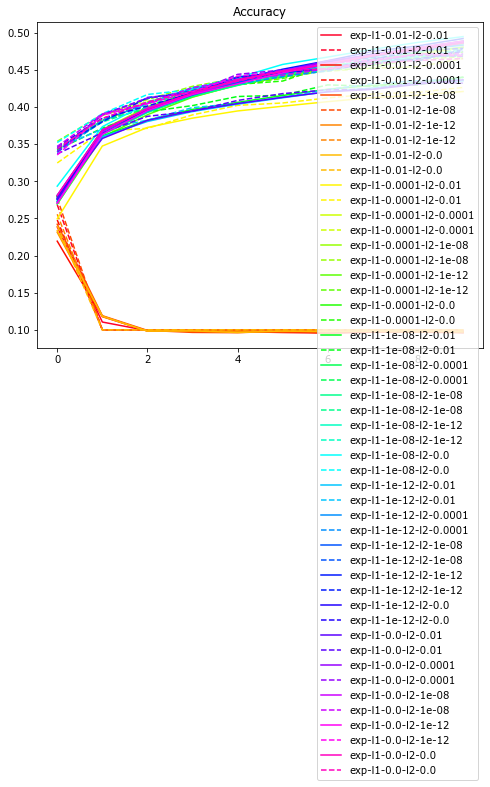

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.cm as mplcm
import matplotlib.colors as colors
NUM_COLORS = 25

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()